# Assignment 1: Numerical Integration

In [146]:

import numpy as np
from scipy import integrate
# import matplotlib's PyPlot library denoting it as plt for brevity
import matplotlib.pyplot as plt
def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1])
    return

#if you don't have LaTeX installed on your laptop and this statement 
# generates error, comment it out
plt.rc('text', usetex=True)

# use jupyter "magic" command to tell it to embed plot into the notebook 
%matplotlib inline

def plot_line(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', legend=None, figsave = None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    
    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        plt.legend(frameon=False, loc='lower left')
    else:
        plt.plot(x, y, lw = 1., c=col)

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()
    
def plot_line_points(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', 
                     xp = None, yp = None, points = False, pmarker='.', pcol='slateblue',
                     legend=None, plegend = None, legendloc='lower right', 
                     plot_title = None, grid=None, figsave = None):
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    # Initialize minor ticks
    plt.minorticks_on()

    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        if points: 
            if plegend:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol, label=plegend)
            else:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)
        plt.legend(frameon=False, loc=legendloc, fontsize=3.*figsize)
    else:
        plt.plot(x, y, lw = 1., c=col)
        if points:
            plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)

    if plot_title:
        plt.title(plot_title, fontsize=3.*figsize)
        
    if grid: 
        plt.grid(linestyle='dotted', lw=0.5, color='lightgray')
        
    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()

## Task 1a

In [147]:
#using given trapzd function here
def trapzd(func, a, b, hstep, *args):
    """
    integration using trapezoidal scheme
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    hstep: float - step size to use
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using trapezoidal integration    
    """
    bma = np.abs(b-a)
            
    nstep = np.int(bma / hstep) 
    #print("a: ",a,"b: ",a,"nstep: ",nstep)
    if nstep == 1:
        #print("if")
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        #print("else")
        xd = a + np.arange(nstep) * hstep # np.arange creates a vector of values from 0 to nstep-1
        #print("xd_trap: ",xd)
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd[1:],*args))) * hstep


def myromberg(func, a, b, hstep, *args):
    """
    integration using Romberg scheme
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    hstep: float - step size to use
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using Romberg integration    
    """
    #print(hstep)
    k = np.log2(2*(b-a)/hstep) #ensure subintervals are power of 2
    nstep = 2**(k-1)
    #print("hstep: ",hstep,"nstep: ",nstep, "k: ",k)

    xd = a+(2.*(np.arange(nstep)+1)-1)*(hstep/2.) #vector of points for eval
    #print("xd: ",xd)
    return (1./3)*(trapzd(func, a, b, hstep, *args) + 2*hstep*np.sum(func(xd, *args)))


### Testing myromberg() 

I am checking the Romberg function for the integral of (1) $sin(x)$ on [0,$\pi$] and (2)$e^x$ on [0,1] for h-step = $\frac{1}{256}$. The computed results are close to 2 and 1.7182... respectively, so it seems like the function is working correctly.

In [148]:
#Computation by Romberg scheme
print(myromberg(np.sin,0,np.pi,1/1024))
print(myromberg(np.exp,0,1,1/256))

#calculate exact answer for (2)
np.exp(1) - np.exp(0)
#integrate.romberg(np.sin, 0, np.pi)

1.9999996864189804
1.718281828459184


1.718281828459045

### Scaling of fractional error

The error does scale with $h^4$ (model indicated by the line). The graph also shows that the error of the Romberg computation is approximately bounded by $10^{-16}$ (cannot get any more accurate). This is because error scales $\approx 2\varepsilon\vert x\vert\approx 2.2\times 10^{-16}\vert x\vert$. The exact value $x = 2$ is comparatively large in this case and so the fractional error is proportionally large as well.

In [149]:
#create h-grid in logspace
exp = np.linspace(-8,0,20) 
hgrid = 10.**exp

j = np.arange(0,20)

exact = 2.0 #save exact integral answer to (1)
a = 0
b = np.pi

hgrid = (b-a)/(2**j)
  #expected that total num of sub-intervals of (a,b), which is 2**j, is a power of 2 


error=[]
#idx = 0
for i in range(len(hgrid)):
    #print(idx)
    #trap = trapzd(np.sin, a, b, hgrid[i],test)
    rom = myromberg(np.sin, a, b, hgrid[i])
    e_i = abs(1.-(rom/exact))
    error.append(e_i)
    #idx = idx+1

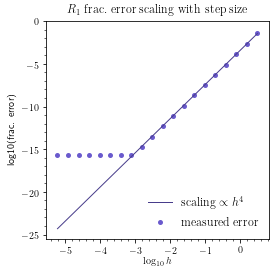

In [150]:
#compute fractional error
error = np.maximum(1./2**52,error)
ferr_model = error[1] * (hgrid/hgrid[1])**4

plot_line_points(np.log10(hgrid), np.log10(ferr_model), 
                 xlabel=r'$\log_{10} h$', ylabel=r'log10(frac. error)', 
                 xp=np.log10(hgrid), yp=np.log10(error), figsize=4, points=True,
                 legend=r'${\rm scaling} \propto h^4$',
                 plegend = r'$\rm measured\ error$',
                 plot_title=r'$R_1\ \rm frac.\ error\ scaling\ with\ step\ size$')


# Task 1b

myromberg_h(func, a, b, atol, rtol, \*args) performs integration with the Romberg scheme and chooses an h to return a value within the specified tolerances.


In [151]:

#helper function to compute absolute and fractional error
def errors(func, a, b, hstep,*args):
    """
    computes absolute error and fractional error
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    hstep: step size
    
    Returns:
    --------
    float, float - absolute error, fractional error
    """
    rom = myromberg(func, a, b, hstep,*args)
    trap = trapzd(func, a, b, hstep,*args)
    if rom:
        abs_error =np.maximum(abs(rom - trap), 1./2**52)
        frac_error = np.maximum(abs(1-trap/rom), 1./2**52)
        if abs_error == 1./2**52:
            print("alert")
        #print("rom: ",rom, "trap: ",trap)
        #print("abs_error: ", abs_error, ", frac_error: ",frac_error)
        return abs_error, frac_error
    else:
        return abs(trap) #return absolute error only
        print("romberg function returns 0: fractional error not computed")

def choose_h(func, a, b, atol, rtol, *args):
    """
    selects minimum step h to achieve input absolute tolerance and fractional accuracy
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    atol: threshold absolute tolerance
    rtol: threshold fractional accuracy 
    
    Returns:
    --------
    float - hstep that would will return an error <= min(atol, rtol)
            if rtol = 0, then returns atol by default
    """
    #how to define h-grid?
    j = np.arange(0,20)
    hgrid = (b-a)/(2**j) #create h-grid with with 2**j sub-intervals
    h_abs, h_frac = 0, 0 #initialize chosen h's to largest h
    #print(hgrid)
    #print("length: ",len(hgrid))
    for i in range(len(hgrid)):
        #print(i)
        absError, fracError = errors(func, a, b, hgrid[i],*args)
        if h_abs != 0 and h_frac != 0:
            #print("stop")
            return min(h_abs, h_frac) #return smallest possible h
        elif h_abs == 0: 
            if absError < atol:
                #print("SELECT h_abs: ",hgrid[i])
                h_abs = hgrid[i] #choose h corresponding to absolute error
        elif h_frac == 0:
            if fracError < rtol:
                #print("SELECT h_frac: ",hgrid[i])
                h_frac = hgrid[i] #choose h corresponding to fractional error
    #print("choosing smallest h")
    return(hgrid[-1])

def myromberg_h(func, a, b, atol, rtol, *args):
    """
    integration using Romberg scheme, with min(atol, rtol)
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    atol: threshold absolute tolerance
    rtol: threshold fractional accuracy 
    
    Returns:
    --------
    float - value of the integral with min(atol, rtol) 
    """
    min_h = choose_h(func, a, b, atol, rtol, *args)
    r = myromberg(func, a, b, min_h, *args)
    return r

### Testing the new Romberg routine

I am testing the routine by computing the integral $sin(x)$ on [0,$\pi$] with different tolerance values and checking if the computed fractional and absolute errors are less than the input tolerance levels.

In [152]:
#define testing parameters
exact = 2.0 #save exact integral answer
a = 0
b = np.pi
abs_tol = 10**(-3)
rel_tol = 10**(-3)

#generate tolerance array
tol=[]
for i in range(-8,-1):
    tol.append(10**i)
print(tol)

#test variety of tolerances
for i in range(len(tol)):
    r1 = myromberg_h(np.sin, a, b,tol[i], rel_tol)
    frac_error = abs(1.-(r1/exact))
    abs_error = abs(r1 - exact)
    print("r1: ", r1, "atol",tol[i],"true frac error: ",frac_error, "true abs error:", abs_error)

    

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01]
r1:  2.0 atol 1e-08 true frac error:  0.0 true abs error: 0.0
r1:  2.0 atol 1e-07 true frac error:  0.0 true abs error: 0.0
r1:  2.0 atol 1e-06 true frac error:  0.0 true abs error: 0.0
r1:  2.0000000000000613 atol 1e-05 true frac error:  3.064215547965432e-14 true abs error: 6.128431095930864e-14
r1:  2.000000000000984 atol 0.0001 true frac error:  4.920508445138694e-13 true abs error: 9.841016890277388e-13
r1:  2.000000000252002 atol 0.001 true frac error:  1.2600098742154842e-10 true abs error: 2.5200197484309683e-10
r1:  2.000000064530002 atol 0.01 true frac error:  3.226500089326123e-08 true abs error: 6.453000178652246e-08


# Task 1c 

lum(z, H0, Om0, OmL, atol, rtol) computes the luminosity using Romberg integration with the specified tolerances.

In [120]:
#Testing parameters
#d_L_simple, dl_func, _dc functions are copied from HW01 notes
clight = 2.99792458e5 # c in km/s
H0, Om0, OmL = 70., 0.3, 0.7;
Omk = 1.0 - Om0 - OmL
z = 2.0

hstep = 1.e-6

# function that works only for models with OmL = 0
def d_L_simple(z, H0, Om0):
    q0 = 0.5 * Om0
    q0z = q0 * z
    return clight * z/H0 * (1. + (z-q0z) / (1. + q0z + np.sqrt(1. + 2.*q0z)))  

def dl_func(x, H0, Om0, OmL, Omk):
    """returns 1/E(z), the function to be integrated to find d_C"""
    #print("x: ",x," Om0: ",Om0," OmL: ",OmL," Omk: ",Omk)
    z1 = 1.0 + x; z12 = z1 * z1
    return 1.0 / np.sqrt(z12*(Om0*z1 + Omk) + OmL)


1.9999999999997802

In [121]:
def _dc(z1, z2, hstep, *args):
    """
    helper function to compute D_c from z1 to z2 by numerical integration using trapzd
    
    Parameters: 
    -----------
    z1, z2: floats = redshift integration limits
    hstep: float = step size for trapezoidal integration
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using trapezoidal integration
    """
    return trapzd(dl_func, z1, z2, hstep, *args)

In [122]:
def lum(z, H0, Om0, OmL, atol, rtol):
    """
    routine computing luminosity distance from z=0 to z 
    using helper routine for comoving distance _dc
    
    Parameters:
    -----------
    z: float - redshift to which to compute d_L
    H0: float - Hubble constant in units of km/s/Mpc
    Om0: float - dimensionless mean matter density in the universe, >= 0
    OmL: float - dimensionless mean vacuum energy density in the universe
    atol: minimum absolute tolerance
    rtol: minimum fractional error
     
    Returns:
    --------
    float - value of d_L(z, H0, Om0, OmL) 
            estimated using trapezoidal integration with hstep chosen by atol/rtol
    """
    if 1.0+OmL == 1.0: # note that I exploit the roundoff error in testing whether OmL is consistent with zero
        return d_L_simple(z, H0, Om0) # if OmL=0, use simple formula without integration
    else: # otherwise use numerical integration to compute distance 
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        args = [H0, Om0, OmL, Omk]
        hstep = choose_h(dl_func, a, b, atol, rtol, *args)
        dc = _dc(0., z, hstep, *args)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

In [123]:
#Testing the luminosity function

H0, Om0, OmL = 70., 0.3, 0.7;
z = 2.0

hstep = 1.e-6

lum(z, H0, Om0, OmL, 0.01, 10**(-7))

15534.286470667645